# Base de dados

Inicialmente, importar a base e fazer os ajustes necessários antes de iniciar a operação.

In [65]:
# Importar a lib Pandas
import pandas as pd

# Determinar origem dos dados (URL)
URL = 'https://raw.githubusercontent.com/profviniciusheltai/AulaIA/refs/heads/main/Projeto03.csv'

# Criar DataFrame com base nos dados
df = pd.read_csv(URL)

# Exibir cabeçalho da tabela
df.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


Renomear os dados:

- "unfinished" -> "nao_finalizado"
- "expected_hours" -> "horas_esperado"
- "price" -> "preco"


Separar os atributos:

- X1: "nao_finalizado"
- X2: "horas_esperado"
- Y: "preco"

In [66]:
# Renomear os indices
mapa={
    "unfinished":"nao_finalizado",
    "expected_hours":"horas_esperado",
    "price":"preco"
}

df = df.rename(columns=mapa)

Criação de coluna auxiliar "finalizado" que recebe o inverso dos valores da coluna "nao_finalizado"

In [67]:
# Dicionario de troca de 0 para 1 e 1 para 0
troca = {
    0 : 1,
    1 : 0
}

# Aplicar o dicionario e atribuir numa nova coluna chamada "Finalizado"
df['finalizado'] = df['nao_finalizado'].map(troca)

# Exibir o cabeçalho da tabela
print(df)

      nao_finalizado  horas_esperado  preco  finalizado
0                  1              26    192           0
1                  1              88   9015           0
2                  1              89   2577           0
3                  1              42    275           0
4                  1              39    170           0
...              ...             ...    ...         ...
2152               0              80   7518           1
2153               1              52   1332           0
2154               0              40    473           1
2155               0              75   5324           1
2156               1              37    377           0

[2157 rows x 4 columns]


Visualizar gráfico de dispersão dos dados que montam o valor (horas_esperado e preco)

<Axes: xlabel='horas_esperado', ylabel='preco'>

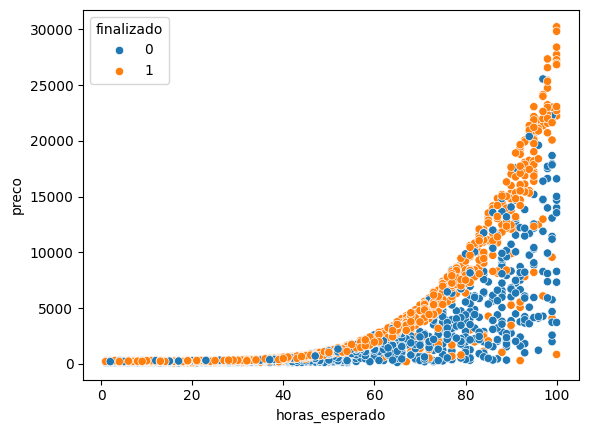

In [68]:
# Importar modulo para plotar o gráfico
import seaborn as sns

# Montar o gráfico com os dados
sns.scatterplot(x='horas_esperado', hue='finalizado', y='preco', data=df)

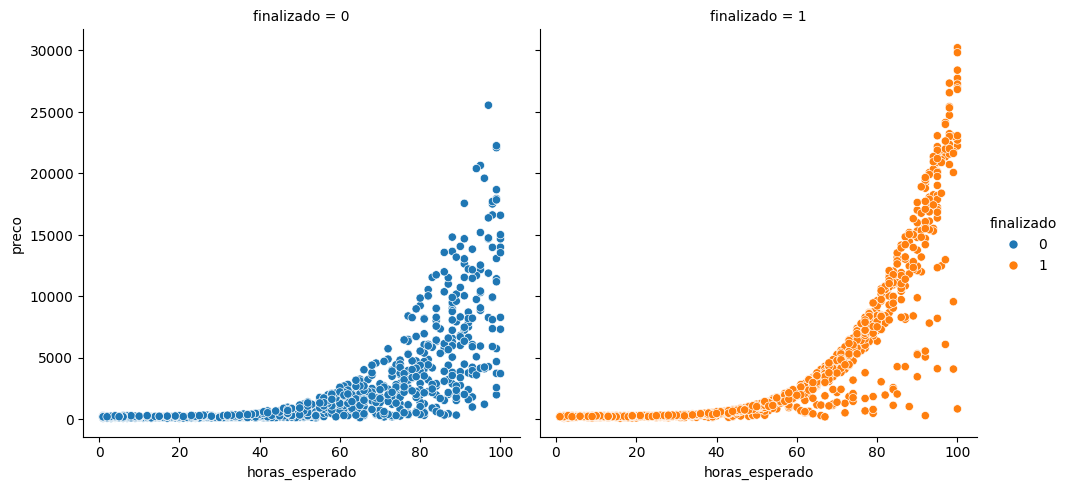

In [69]:
# Plotando o grafico relativo a coluna do finalizado:
sns.relplot(x='horas_esperado', y='preco', hue='finalizado', col='finalizado', data=df)

Criando as bases de dados (modelagem)

In [70]:
# Define quais são os dados de x e y
x = df[['horas_esperado', 'preco']]
y = df['finalizado']

# Importando modelo de separação de dados
from sklearn.model_selection import train_test_split
SEED = 20

# Criando as bases de treino e teste com train_test_split
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state=SEED, test_size=0.3)

# Demonstrando as bases
print(f"Treino: {len(treino_x)}; Teste: {len(teste_x)}")

Treino: 1509; Teste: 648


# Treinamento do modelo

Criando as bases de treino_x, teste_x, treino_y, teste_y, escolha do modelo e aplicação nas bases

In [71]:
# Importação do LinearSVC - induzir ao erro
from sklearn.svm import LinearSVC

# Criação do modelo
modelo = LinearSVC()

# Treinamento do modelo
modelo.fit(treino_x, treino_y)

LinearSVC()

# Testes do modelo

Realizar a previsão e medir a precisão do modelo

In [72]:
# Importação do accuracy_score

from sklearn.metrics import accuracy_score

# Definir a variavel previsoes como "resposta" deste teste:
previsoes = modelo.predict(teste_x)

'''
# Imprime o resultado das previsões
print(f"Previsao: {previsoes}")

# Imprime o resultado esperado
print(f"Esperado: {teste_y.values}")'''

# Avalia se a previsão foi feita de forma correta
precisao = accuracy_score(teste_y, previsoes)

print(f"Precisão do modelo: {precisao * 100:.2f}%")

Precisão do modelo: 56.94%


In [73]:
# Conta quantos itens 0 e 1 tem no treino_y
print(f"Quantidade no Treino Y: {treino_y.value_counts()}")

# Conta quantos itens 0 e 1 tem no "teste_y"
print(f"\nQuantidade no Teste Y: {teste_y.value_counts()}")

# Calcula a relação entre os dados
print(f"\nRelação entre os dados de treino: {(treino_y.value_counts()[0] / treino_y.value_counts()[1]):.2f}")
print(f"\nRelação entre os dados de teste: {(teste_y.value_counts()[0] / teste_y.value_counts()[1]):.2f}")


Quantidade no Treino Y: finalizado
1    803
0    706
Name: count, dtype: int64

Quantidade no Teste Y: finalizado
1    331
0    317
Name: count, dtype: int64

Relação entre os dados de treino: 0.88

Relação entre os dados de teste: 0.96
